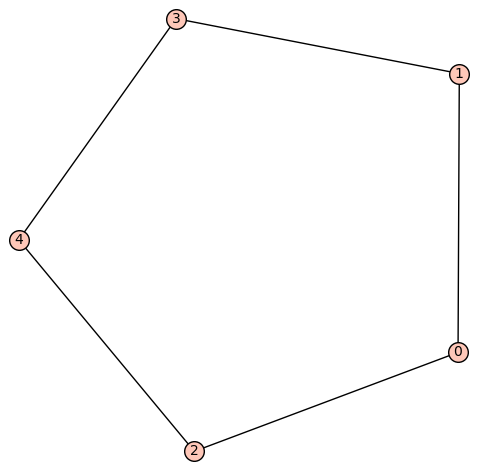

[0 1 1 0 0]
[1 0 0 1 0]
[1 0 0 0 1]
[0 1 0 0 1]
[0 0 1 1 0]
2
Graf je tipa (SB)


In [3]:
# Ta datoteka vsebuje kodo za preverjanje, če je graf tipa (SB) ali ne 
#
# nek primer grafa, ki ni tipa (SB)
#G = graphs.CompleteGraph(4)

# primer grafa, ki je tipa (SB)
G = Graph({0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1, 4], 4: [2, 3]})

P = G.plot()
P.show()

adj = G.adjacency_matrix() # matrika sosednosti
print(adj)

diameter = G.diameter()
print(diameter)

if diameter != 2:
    print("Premer ni 2, graf ni tipa (SB)")

def nor(a, b):
    if a == 0 and b == 0:
        return 1
    return 0

is_sb = False

for i, row in enumerate(adj):
    for j, v in enumerate(row):
        if v == 1 and i < j: # našli smo soseda, drugi pogoj je zato, da nismo že prej preverjali teh dveh vozlišč
                        
            row_neighbour = adj[j] # sosedi od soseda

            #print("comparing: ", "i: ", i, ", j: ", j, ", ", row, " ", row_neighbour)

            # preverit je treba, da nimata nobenih skupnih sosedov, ter da obstaja vozlišče, ki ni sosed od njiju dveh
            
            pairs = list(zip(row, row_neighbour))
            
            common_neighbours = list(x and y for x, y in pairs)
            
            if common_neighbours.count(1) > 1: # iščemo večje kot 1, ker že vemo da sta i in j soseda
                # našli smo skupnega soseda
                continue
            
            non_adj_vertices = list(nor(x, y) for x, y in pairs)
            #print(non_adj_vertices)
            
            if non_adj_vertices.count(1) > 0:
                # našli smo vozlišče, ki ni sosed od danih dveh vozlišč
                is_sb = True
                break
                
        if is_sb:
            # smo že ugotovili, da je graf tipa (SB)
            break

if is_sb:
    print("Graf je tipa (SB)")
else:
    print("Graf ni tipa (SB)")
            
            
            
            
            

In [4]:
# tukaj je sedaj cel algoritem, ki preveri ali je graf tipa (SB), zapakiran v funkciji

g1 = graphs.CompleteGraph(4)
g2 = Graph({0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1, 4], 4: [2, 3]})
g3 = Graph({0: [1, 2], 1: [0, 3], 2: [0, 4], 3: [1, 4], 4: [2, 3, 5], 5: []})

def is_sb(G: Graph) -> bool:
    diameter = G.diameter()
    if diameter != 2:
        return False
    
    adj = G.adjacency_matrix()

    for i, row in enumerate(adj):
        for j, v in enumerate(row):
            if v == 1 and i < j:
                pairs = list(zip(row, adj[j]))

                common_neighbours = list(x and y for x, y in pairs)
                if common_neighbours.count(1) > 1:
                    continue

                non_adj_vertices = list(x == 0 and y == 0 for x, y in pairs)
                if non_adj_vertices.count(1) > 0:
                    return True
    return False


print(is_sb(g1))
print(is_sb(g2))
print(is_sb(g3))

False
True
False
